# Week three: Churn prediction with classification

We want to send promotions to customers we don't think will leave so we need to calculate the churn possibility. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 3.1 Import the data

In [2]:
customer_data = pd.read_csv('data/telco_customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_data.head().T # makes the columns the row index (as there are many this is easier to read)

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### 3.2 Data cleaning

In [3]:
customer_data.columns = customer_data.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(customer_data.dtypes[customer_data.dtypes == 'object'].index)

for c in categorical_columns:
    customer_data[c] = customer_data[c].str.lower().str.replace(' ', '_')

In [4]:
customer_data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
customer_data['totalcharges'].head() # actually looks like a number

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: object

In [6]:
pd.to_numeric(customer_data['totalcharges']) # error occurs because there are non numerical values

ValueError: Unable to parse string "_" at position 488

In [7]:
customer_data['totalcharges'] = pd.to_numeric(customer_data['totalcharges'], errors='coerce') 
customer_data[customer_data['totalcharges'].isnull()][['totalcharges', 'customerid']].head()

,totalcharges,customerid
488,NaN,4472-lvygi
753,NaN,3115-czmzd
936,NaN,5709-lvoeq
1082,NaN,4367-nuyao
1340,NaN,1371-dwpaz


In [8]:
customer_data['totalcharges'] = customer_data['totalcharges'].fillna(0) # filling missing values may not be the best approach

In [9]:
customer_data['churn'].head()
# currently yes and no we need to make this numerical

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [10]:
# customer_data['churn'] = customer_data['churn'].apply(lambda x: 1 if x == 'yes' else 0 
customer_data['churn'] = (customer_data['churn'] == 'yes').astype(int)

### 3.3 Data Validation Framework

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(customer_data, test_size=0.2, random_state=1)

df_train, df_val  = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25% here means it will be 20% of the overall data set

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 Exploraty Data Analysis

In [14]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum() # there are none

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [15]:
df_full_train['churn'].value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

Look at the distribution (how many users are churn) Normalize means we can see this as a percentage.  
Above we see this is 26.9%

Another way to get this churn rate would be taking the mean.

In [16]:
global_churn_rate = df_full_train['churn'].astype(int).mean()
round(global_churn_rate, 2)

0.27

This is because we have a binary variable so the mean of this because it is only the sum of the 1 values divided by the total number of values

In [17]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [18]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']
categorical_features = [x for x in df_full_train.columns.tolist() if x not in numerical_features and x != 'churn' and x != 'customerid']

df_full_train[categorical_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk Ratio

Look at churn rate within each group

In [19]:
churn_female = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
churn_female

0.27682403433476394

In [20]:
churn_male = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
churn_male

0.2632135306553911

In [21]:
churn_live_with_partner = df_full_train[df_full_train['partner'] == 'yes'].churn.mean()
churn_live_with_partner

0.20503330866025166

In [22]:
churn_live_no_partner = df_full_train[df_full_train['partner'] == 'no'].churn.mean()
churn_live_no_partner

0.3298090040927694

In [23]:
round(churn_live_no_partner - global_churn_rate, 2)

0.06

We see that the churn rate for those customers with no partner is about 5% more than the global churn. This indicates that if a customer has a partner or not will have an impact on the churn prediction.

so...


if the difference between the group churn rate and global churn rate is positive they are less likely to churn, however if the difference is negative they are more likley to churn. Depending on how large the difference is indicates how important that feature may be.

In [24]:
# Risk ration group churn rate divided by global churn rate
churn_live_no_partner / global_churn_rate

1.2216593879412643

If the risk ratio is more than 1 the group is more likely to churn if it is less they are less likely to churn. This tells us relative to the global churn.


SELECT  
    gender,  
    AVG(churn),  
    AVG(churn) - global_churn AS diff,  
    AVG(churn) / global_churn) AS risk  
FROM  
    data  
GROUP BY  
    gender;  

In [25]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Now let's repeat this for all the categorical values!

In [26]:
# this means that commands 
from IPython.display import display

In [27]:
for c in categorical_features:
    print(c)
    df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




partner


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




dependents


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




phoneservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




multiplelines


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




internetservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinesecurity


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinebackup


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




deviceprotection


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




techsupport


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingtv


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingmovies


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




contract


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paperlessbilling


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paymentmethod


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


## 3.6 Feature importantance: mutual information

Mutual information - is a measure of the mutual dependence between the two variables. How much we learn about one from the other.

https://en.wikipedia.org/wiki/Mutual_information

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
mutual_info_score(df_full_train['churn'], df_full_train['contract'])

0.0983203874041556

In [30]:
mutual_info_score(df_full_train['churn'], df_full_train['gender'])

0.0001174846211139946

Here we see we learn much more from contract than we do from the gender

In [31]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])

In [32]:
mi = df_full_train[categorical_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

Previously we looked at categorical features now we will look at numerical and using the correlation coeficient, which is a meausrement of the dependancy between two variables. Ie if one variable grows does another also.

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

-1 <= r <= 1

positive means the other variable also grows while a negative value means one will decrease as the other variable grows. Zero means no effect.

X Tenure, (0-72)  
y Churn (0,1)

In [33]:
df_full_train[numerical_features].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

with increase of tenure the churn goes down. Monthly charges have a positive impact so the higher the monthly charges the more churn.

In [34]:
df_full_train[df_full_train['tenure'] <= 2].churn.mean()

0.5953420669577875

we see the churn rate in this group is very high for customers with 2 or less tenure.

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='tenure', ylabel='churn'>

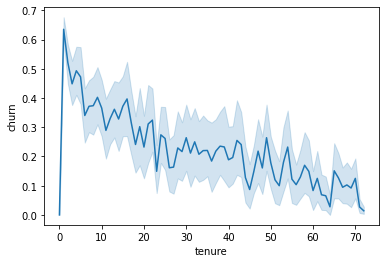

In [36]:
sns.lineplot(x=df_full_train['tenure'], y=df_full_train['churn'])

## 3.8 One Hot Encoding

For categorical data we can leverage One Hot Encoding (OHE) to make the data numerical. We assign a column for each possible category and then assign 1 to the column that the row has and 0 to the other category columns. We can use the scikit learn library for this.

In [37]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [39]:
dv = DictVectorizer()

In [40]:
dv.fit(dicts)

DictVectorizer()

In [41]:
dv.transform(dicts)

<100x5 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

Sparse matrix is for when a matrix has many 0 values, comes from scipi We will not use them however so we will use spare=false.

In [42]:
dv = DictVectorizer(sparse=False)

In [43]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [44]:
dv.transform(dicts[0:5])

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [45]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

so we see the first three columns are for contract and the last two for gender.

This DictVectorizer is smart for example if we would have two categorical variable and one numerical it would transform the two categorical columns but leave the numerical one as is.

In [46]:
train_dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')

In [47]:
dv = DictVectorizer(sparse=False)

In [48]:
X_train = dv.fit_transform(train_dicts) # same as doing fit and then transform. This is our feature matrix!

In [49]:
val_dicts = df_val[categorical_features + numerical_features].to_dict(orient='records')

In [50]:
X_val = dv.transform(val_dicts) # we only run transform on our validate data

## 3.9 Logistic Regression

`g(xi) ≈ yi`  where yi = 0 when there is no churn and 1 where there is churn (the customer is predicted to leave)


We have different tzpes of supervised learning, regression or classification and classification has two main branches binary and multiclassification.
We will use Binary classification to predict this.



Linear regression wo + wTxi where the numbers are between minus infinity and infinity. Logistic regression uses signoid to make these numbers between 0 and 1.

No matter how large the number we give it, it will always be between 0 and 1.

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

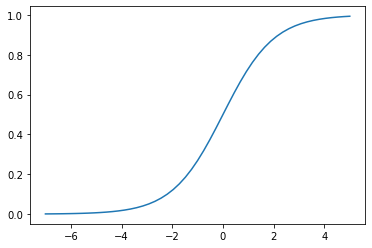

In [52]:
z = np.linspace(-7, 5, 51)

sigmoid(z)

plt.plot(z, sigmoid(z))


In [53]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result


def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with SciKit Learn

- train a model with SciKit-learn
- Apply it to the validation dataset
- Calculate the accuracy

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
model.intercept_[0]

-0.10903322824024995

In [58]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [59]:
# Hard predictions because we already have the exact label (1 means churn)
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [60]:
# soft predictions meaning that we have a probability rather than an exact value
model.predict_proba(X_val)

array([[0.99100335, 0.00899665],
       [0.79546956, 0.20453044],
       [0.78777242, 0.21222758],
       ...,
       [0.86361265, 0.13638735],
       [0.20023891, 0.79976109],
       [0.16259991, 0.83740009]])

The first column is the probability of being negative class (not churn) and the second one is for the positive class (churn). We are interested in the later and then we can set a threshold (0.5 is the default used by model.predict()

In [61]:
y_pred = model.predict_proba(X_val)[:,1]

In [62]:
churn_decision = (y_pred >= 0.5)

In [63]:
df_val[churn_decision].customerid
# These are the customers our model think will churn so we may want to send them a special offer to persude them to stay

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [64]:
(y_val == churn_decision).mean().round(2)

0.8

80% of our predicts match the correct value!

## 3.11 Model interpretation

In [65]:
# using zip to combine variables
a = [1,2,3,4]
b = 'abcd'

dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [66]:
# first lets train a smaller model
small = ['contract', 'tenure', 'monthlycharges']

In [67]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [68]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [69]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

only 5 features three for contract (a categorical variable) and two numerical ones.

In [70]:
X_train_small = dv_small.transform(dicts_train_small)

In [71]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [72]:
w0 = model_small.intercept_[0]
w0

-2.47677565994308

In [73]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [74]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Now we have the weights for our features. A value with a negative value here means less likely to churn. Positive ones will be more likely to churn.

w0 is our base weight and the probability of churning wihtout knowing anything else about the customer. When we use OHE only the category with a one will have its weight applied as the others will be zero because they will be multiplied by 0.

## 3.12 Using the model

In [75]:
dicts_full_train = df_full_train[categorical_features + numerical_features].to_dict(orient='records')

In [76]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [77]:
y_full_train = df_full_train.churn.values

In [78]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [79]:
dicts_test = df_test[categorical_features + numerical_features].to_dict(orient='records')

In [80]:
X_test = dv.transform(dicts_test)

In [81]:
y_pred = model.predict_proba(X_test)[:, 1]

In [82]:
churn_decision = (y_pred >= 0.5)

In [83]:
(churn_decision == y_test).mean()

0.815471965933286

It is a little different then on our validation but only by 1% if it was significantly larger we would want to look again at our model. 

In [84]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [88]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [89]:
X_small = dv.transform([customer])

In [90]:
model.predict_proba(X_small)[0, 1]

0.40568109778598216

In [91]:
y_test[10]

0

## 3.13 Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression